# Terrell Watkins

In [15]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd

# 1.Random Number Generator (30 points)

In [16]:
#The objectives of this lab are to analyze a random number generator and to use a random process to simulate a game show.

In [17]:
#Generate 10,000 uniform random coordinates
N = 10000
coordinates = []
x = np.random.uniform(0,1,N) #Generating 10,000 numbers between 0 through 1 for "x"
y = np.random.uniform(0,1,N) #Generating 10,000 numbers between 0 through 1 for "y"

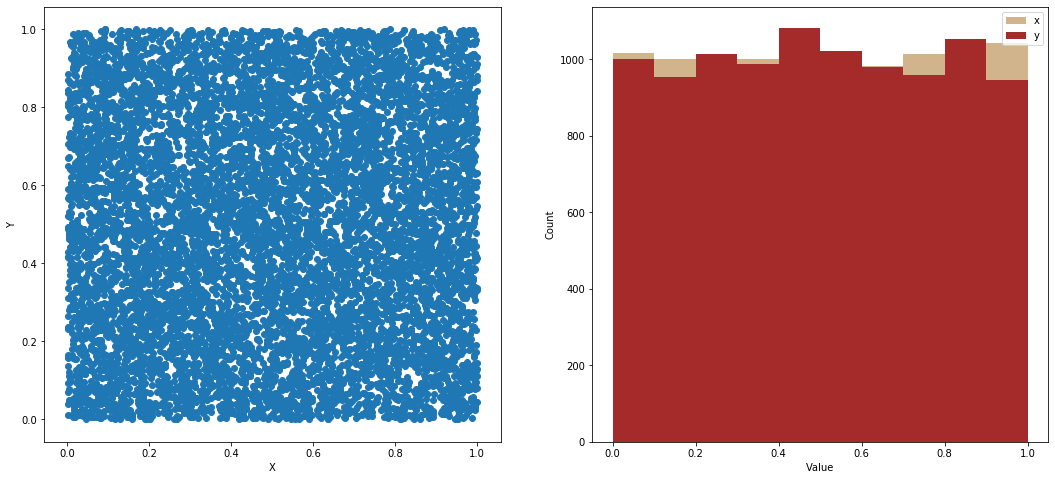

In [18]:
plt.figure(figsize = (18,8)) #figure size
plt.subplot(1,2,1) #plot 1
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.subplot(1,2,2) # plot 2
plt.hist(x, bins = 10, color = 'tan', label = 'x');# plotting "x" and "y" ... resembles "Figure 1"
plt.hist(y, bins = 10, color = 'brown', label = 'y');
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend(loc = 'upper right')

In [19]:
print(f"The mean of 'x': {np.mean(x)}")
print(f"The mean of 'y': {np.mean(y)}")
print("Expected value: 0.5")

The mean of 'x': 0.5030951525426963
The mean of 'y': 0.4991745790646546
Expected value: 0.5


In [20]:
def root_mean(array): #RMSE
    column1, column2 = np.mean(array, axis=0)
    RMSE = np.sqrt((column1 - 0.5)**2 + (column2 - 0.5)**2)
    return RMSE
#We created a function that returns the RMSE, and mean of each column

In [21]:
array_RMSE = np.zeros(10000-10) #Empty list of "0s"
for N in range(10, 10000):
    array = np.random.rand(N,2)
    array_RMSE[N-10] = root_mean(array)

Text(0.5, 1.0, 'LogLog Graph')

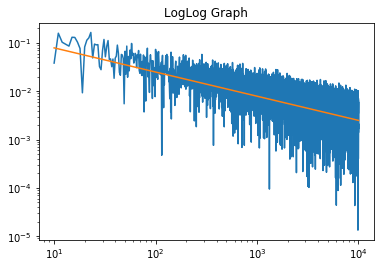

In [22]:
n = np.arange(10,10000)
plt.loglog(n, array_RMSE)
plt.loglog(n, 1/4*(1/np.sqrt(n)))
plt.title("LogLog Graph")

# 1. Monty Hall (70 Points)

# i.

In [23]:
#STEPS TO PLAYING MONTY GAME
#1.Three possible locations of the car and two choices (switch or keep)
#2.Choose 1 of the 3 doors (1/3)
#3.Reveals a door with a goat
#4.Choice to keep same door or choose the other (1/2)
#5.Reveal the door 
"""
Scenarios:
1. Door1, Car2, Keep = Lose
2. Door2, Car1, Keep = Lose
3. Door3, Car3, Keep = Win
4. Door1, Car3, Switch = Win
5. Door2, Car3, Switch = Win
6. Door3, Car1, Switch = Win

Wins = 4
Loss = 6
(4/6) = (2/3)

Probability = (2/3) of the two strategies
"""

'\nScenarios:\n1. Door1, Car2, Keep = Lose\n2. Door2, Car1, Keep = Lose\n3. Door3, Car3, Keep = Win\n4. Door1, Car3, Switch = Win\n5. Door2, Car3, Switch = Win\n6. Door3, Car1, Switch = Win\n\nWins = 4\nLoss = 6\n(4/6) = (2/3)\n\nProbability = (2/3) of the two strategies\n'

# ii.

In [24]:
#Write a program that test the two strategies

#Randomly choose ann integer 1,2,or 3 that represents the door that the host puts the car behind
#First the host needs to put the car behind one of the doors
#The host = random number

In [25]:
#Now the contestant needs to chooses a random number
#contestant = np.random.randint(1,4)
#contestant

In [45]:
def Monty_Hall(doors, repition):
    switchingdoor = 0 #to keep count of the number of wins
    keepingdoor = 0 # to keep count of the number of losses
    count = 0 #Will help keep count of the number of available doors
    available_doors = []
    
    #goes through the games "repition" times
    for rep in range(repition): 
        secondchoice = 0
        winnerdoor = np.random.randint(1, doors+1) #storing the winning doors
        
        doorchoice = np.random.randint(1, doors+1) #choosing a random door between 1-3
        
        #now we need to reveal a door that isn't "doorchoice"
        for door in range(1, doors+1):
            if door != doorchoice:
                available_doors.append(door)
                
        #now that we have found the available doors, we need to choose one of...
        #...those doors and show a goat
        goat_door = np.random.choice(available_doors)
        for elem in available_doors:
            available_doors.remove(elem)
        
        #We now have show the goat door, now it's time to find out if he or she wants to.. 
        #...switch doors
        
        #Using booleans to switch between the user deciding to switch and keep door
        answer = True
        if answer == True:
            answer = False
        elif answer == False:
            answer = True
            
        if answer == True: #Yes #switch door
            secondchoice = np.random.choice(available_doors) #if the user decides to switch, choose another door
            if secondchoice == winnerdoor:
                switchingdoor = switchingdoor + 1
            else:
                keepingdoor = keepingdoor + 1
        elif answer == False: #No #keeping the door
            if doorchoice == winnerdoor:
                keepingdoor = keepingdoor + 1
            else:
                switchingdoor = switchingdoor + 1
         
        #deletes every element from list to start over with an empty list
        for elem in available_doors: 
            available_doors.remove(elem)
            
    #prints out information          
    print(f"Switching: {switchingdoor}, percentage = {switchingdoor/repition * 100}%")
    print(f"Keeping/Not Switching: {keepingdoor}, percentage = {keepingdoor/repition * 100}%")    

In [47]:
Monty_Hall(3,100)

Switching: 66, percentage = 66.0%
Keeping/Not Switching: 34, percentage = 34.0%


# iii.

In [52]:
Monty_Hall(100,10000)

Switching: 9892, percentage = 98.92%
Keeping/Not Switching: 108, percentage = 1.08%
